In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [ ]:
class Unit(nn.Module):
    """感知器是一个线性层"""
    """nn.Module 需要W权重和b偏差"""
    def __init__(self, inpput_dim):
        super(Unit, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        reutrn torch.sigmoid(self.fc1(x_in)).squeeze()

E:\ProgramData\Miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


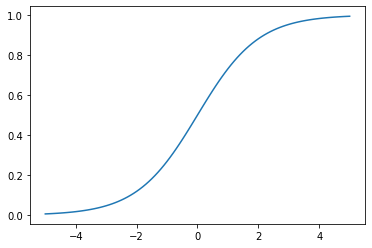

In [2]:
# sigmiod 函数
x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

E:\ProgramData\Miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


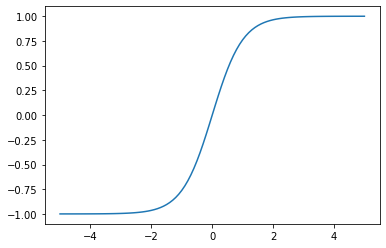

In [3]:
# tanh 函数
x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

E:\ProgramData\Miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


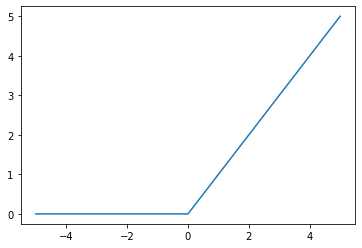

In [4]:
# Relu 函数
# 取 -5 到 5 每隔0.1取一个值
x = torch.range(-5., 5., 0.1)
y = torch.relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

E:\ProgramData\Miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


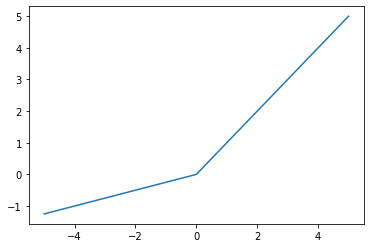

In [5]:
# Relu 变体
prelu = nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

In [6]:
# Softmax
softmax = nn.Softmax(dim = 1)
x_input = torch.rand(1, 3)
y_output = softmax(x_input)
# x_input 的值组合在一起是随机的，并不是按概率分布的
print("x_input: \n",x_input)
print("x_input_sum: \n",torch.sum(x_input, dim=1))
#而y_output 输出的值是经过softmax的，是概率的形式，总和为1
print("y_output: \n",y_output)
print("y_output_sum: \n",torch.sum(y_output, dim=1))

x_input: 
 tensor([[0.1835, 0.1792, 0.0754]])
x_input_sum: 
 tensor([0.4382])
y_output: 
 tensor([[0.3456, 0.3441, 0.3102]])
y_output_sum: 
 tensor([1.0000])


In [11]:
# 最小二乘 均方差损失函数
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad = True)
print(outputs)
targets = torch.randn(3, 5)
print(targets)
loss = mse_loss(outputs, targets)
print(loss)

tensor([[ 0.0917,  0.3710, -0.5531,  1.2227, -0.6127],
        [-1.2754, -1.0954,  0.4445,  2.7092, -1.3522],
        [ 1.1191, -0.0328, -1.6359, -0.6775, -1.5594]], requires_grad=True)
tensor([[ 0.4142,  1.3559,  0.7050, -0.6537,  0.1251],
        [-0.7892,  0.0465,  0.3041, -0.7848, -0.9989],
        [-1.7560,  0.6112, -0.1726, -2.4625,  0.6164]])
tensor(2.6239, grad_fn=<MseLossBackward>)


In [12]:
a = np.random.rand(1, 3) #从(0, 1]中 选取随机数
b = np.random.randn(2, 2) # 标准正态（均值为0，方差是1）的均匀伪随机数
c = np.random.random(6)
print("a: ",a)
print("b: ",b)
print("c: ",c)

a:  [[0.61995767 0.34002717 0.4861757 ]]
b:  [[-0.40858642  0.01593267]
 [-0.0391154  -0.3557601 ]]
c:  [0.7145108  0.15664585 0.86398674 0.88038629 0.76300826 0.97794207]


In [23]:
# 交叉熵损失函数
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad = True)
print(outputs)
targets = torch.tensor([1, 0, 4], dtype = torch.int64)
print(targets)
loss = ce_loss(outputs, targets)
print(loss)

tensor([[ 0.1779,  1.5482, -0.9500,  0.9026, -1.1063],
        [ 1.5649,  1.0118, -0.5514,  0.3814, -0.7546],
        [-2.4826, -0.7696, -0.2051, -0.7982, -0.0455]], requires_grad=True)
tensor([1, 0, 4])
tensor(0.8211, grad_fn=<NllLossBackward>)


In [27]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probal = sigmoid(torch.randn(4, 1, requires_grad = True))
targets = torch.tensor([1, 0, 1, 0], dtype = torch.float32).view(4, 1)
loss = bce_loss(probal, targets)
print(probal)
print(targets)
print(loss)

tensor([[0.1491],
        [0.5652],
        [0.6380],
        [0.3459]], grad_fn=<SigmoidBackward>)
tensor([[1.],
        [0.],
        [1.],
        [0.]])
tensor(0.9025, grad_fn=<BinaryCrossEntropyBackward>)


In [ ]:
input_dim = 2
# 学习率
lr = 0.001
perceptron = Perceptron(input_dim = input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params = perceptron.parameters(), lr = lr)

In [ ]:
# 训练循环
for epoch_i in range(n_epochs):
    #小批量 梯度下降
    for batch_i in range(n_batches):
        # 获取 输入数据 和 目标数据
        x_data, y_target = get_toy_data(batch_size)
        # 清除 梯度
        perceptron.zero_grad()
        # 前向传播获得 预测值
        y_pred = perceptron(x_data, apply_sigmoid = True)
        # 计算损失函数
        loss = bce_loss(y_pred, y_target)
        # 后向传播
        loss.backward()
        # 梯度优化
        optimizer.step()